In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from sklearn.cross_decomposition import CCA

In [ ]:
df_Y = pd.read_csv('down_fish.csv',encoding = 'utf-8-sig')
df_X = pd.read_csv('down_water.csv',encoding = 'utf-8-sig')

In [ ]:
X = df_X[['pH', 'Chl-a', 'Alga', 'Cond', 'Turbidity', 'TP','Transparency', 'DO']]
Y = df_Y

In [ ]:
# normalization
X_mc = (X-X.mean())/(X.std())
Y_mc = (Y-Y.mean())/(Y.std())

In [ ]:
ca = CCA()
ca.fit(X_mc, Y_mc)
X_c, Y_c = ca.transform(X_mc, Y_mc)

In [ ]:
cc_res = pd.DataFrame({"CCX_1":X_c[:, 0],
                       "CCY_1":Y_c[:, 0],
                       "CCX_2":X_c[:, 1],
                       "CCY_2":Y_c[:, 1],
                       "Season":df_X.Season.tolist(),
                      "before_after":df_X.before_after.tolist(),})

In [ ]:
corr_1=np.corrcoef(X_c[:, 0], Y_c[:, 0])[0,1]
corr_2=np.corrcoef(X_c[:, 1], Y_c[:, 1])[0,1]
print('Canonical correlation of CCX_1:',round(corr_1,2),' | ','The explaination of total variance of CCX_1:',round(corr_1*corr_1,2))
print('Canonical correlation of CCX_2:',round(corr_2,2),' | ','The explaination of total variance of CCX_2:',round(corr_2*corr_2,2))

Canonical correlation of CCX_1: 0.78  |  The explaination of total variance of CCX_1: 0.61
Canonical correlation of CCX_2: 0.64  |  The explaination of total variance of CCX_2: 0.4


In [ ]:
ccX_df = X_mc
ccX_df['CCX_1']=X_c[:, 0]
ccX_df['CCX_2']=X_c[:, 1]

In [ ]:
corr_X_df= ccX_df.corr(method='pearson') 
df = corr_X_df[['CCX_1','CCX_2']].drop(['CCX_1','CCX_2'])
resX = pd.DataFrame(columns = ['CCX_1','CCX_2'], index = ['pH', '葉綠素a', '藻個數', '電導度', '濁度', '總磷','透明度', '溶氧量'])
resX['CCX_1'] = df['CCX_1'].to_numpy()
resX['CCX_2'] = df['CCX_2'].to_numpy()
resX
resX.round(2).to_csv('resX.csv',encoding='utf-8-sig')

In [ ]:
ccY_df = Y_mc
ccY_df['CCY_1']=Y_c[:, 0]
ccY_df['CCY_2']=Y_c[:, 1]
corr_Y_df= ccY_df.corr(method='pearson') 
resY = corr_Y_df[['CCY_1','CCY_2']].drop(['CCY_1','CCY_2'])
resY
resY.round(2).to_csv('resY.csv',encoding='utf-8-sig')

Text(0.5, 1.0, 'First Pair of Canonical Covariate, corr = 0.78')

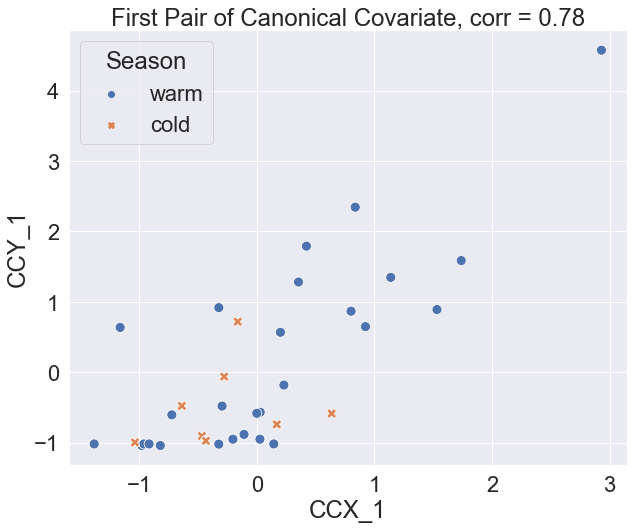

In [ ]:
sns.set(font_scale = 2)
plt.figure(figsize=(10,8))
sns.scatterplot(x="CCX_1",
                y="CCY_1", 
                hue="Season", data=cc_res,style='Season',s=100)
plt.title('First Pair of Canonical Covariate, corr = %.2f' %
         np.corrcoef(X_c[:, 0], Y_c[:, 0])[0, 1])

Text(0.5, 1.0, 'First Pair of Canonical Covariate, corr = 0.64')

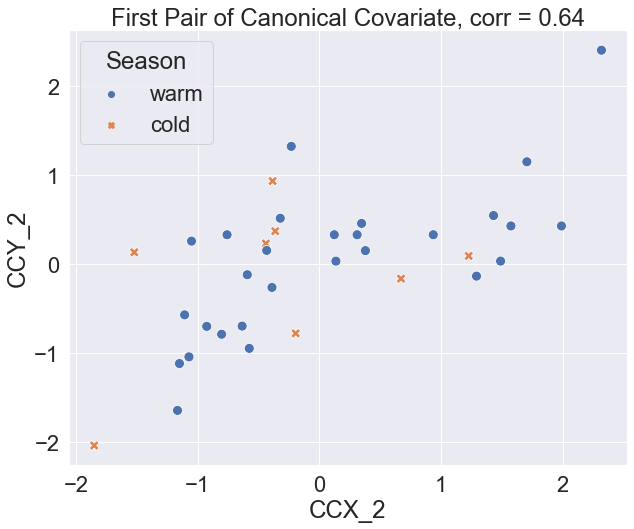

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="CCX_2",
                y="CCY_2", 
                hue="Season", data=cc_res,style='Season',s=100)
plt.title('First Pair of Canonical Covariate, corr = %.2f' %
         np.corrcoef(X_c[:, 1], Y_c[:, 1])[0, 1])

Text(0.5, 1.0, 'First Pair of Canonical Covariate, corr = 0.78')

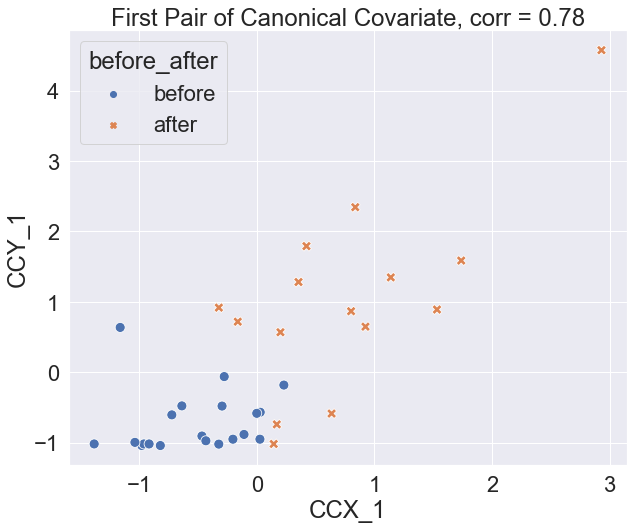

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="CCX_1",
                y="CCY_1", 
                hue="before_after", data=cc_res,style='before_after',s=100)
plt.title('First Pair of Canonical Covariate, corr = %.2f' %
         np.corrcoef(X_c[:, 0], Y_c[:, 0])[0, 1])

Text(0.5, 1.0, 'First Pair of Canonical Covariate, corr = 0.64')

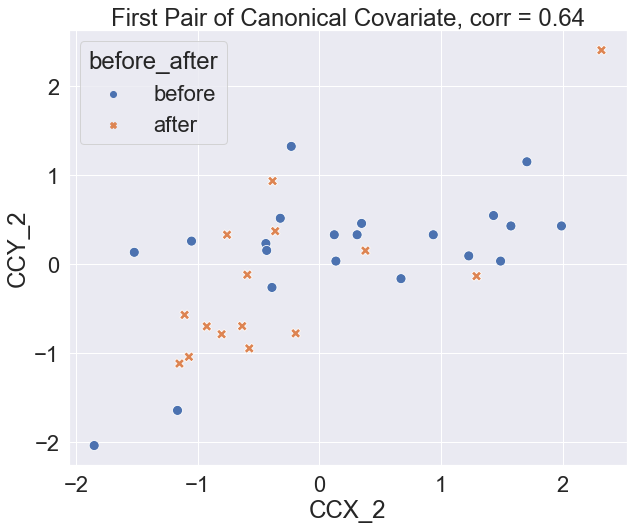

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="CCX_2",
                y="CCY_2", 
                hue="before_after", data=cc_res,style='before_after',s=100)
plt.title('First Pair of Canonical Covariate, corr = %.2f' %
         np.corrcoef(X_c[:, 1], Y_c[:, 1])[0, 1])